In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, MaxPooling1D, Flatten
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

2024-04-12 10:16:52.443176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 10:16:52.443290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 10:16:52.583959: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = [line.strip() for line in open("/kaggle/input/dl-dataset/DL Dataset/train.txt", "r").readlines()[1:]]
raw_x_train = [line.split("\t")[1] for line in train]
raw_y_train = [line.split("\t")[0] for line in train]

test = [line.strip() for line in open("/kaggle/input/dl-dataset/DL Dataset/test.txt", "r").readlines()]
raw_x_test = [line.split("\t")[1] for line in test]
raw_y_test = [line.split("\t")[0] for line in test]

val=[line.strip() for line in open("/kaggle/input/dl-dataset/DL Dataset/val.txt", "r").readlines()]
raw_x_val=[line.split("\t")[1] for line in val]
raw_y_val=[line.split("\t")[0] for line in val]


In [3]:
tokenizer = Tokenizer(lower=True, char_level=True, oov_token='-n-')
tokenizer.fit_on_texts(raw_x_train + raw_x_val + raw_x_test)
char_index = tokenizer.word_index
sequence_length=200
x_train = pad_sequences(tokenizer.texts_to_sequences(raw_x_train), maxlen=sequence_length)
x_val = pad_sequences(tokenizer.texts_to_sequences(raw_x_val), maxlen=sequence_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(raw_x_test), maxlen=sequence_length)

encoder = LabelEncoder()

y_train = encoder.fit_transform(raw_y_train)
y_val = encoder.transform(raw_y_val)
y_test = encoder.transform(raw_y_test)

In [4]:
params = {'loss_function': 'binary_crossentropy',
                       'optimizer': 'adam',
                       'sequence_length': 200,
                       'batch_train': 5000,
                       'batch_test': 5000,
                       'categories': ['phishing', 'legitimate'],
                       'char_index': None,
                       'epoch': 30,
                       'embedding_dimension': 50,
                       'dataset_dir': "../dataset/small_dataset/"}

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense,LSTM,Bidirectional
model = Sequential()
voc_size = len(char_index.keys())
print("voc_size: {}".format(voc_size))
model.add(Embedding(voc_size + 1,50))
model.add(Bidirectional(LSTM(32, return_sequences=True)))

model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))

model.add(Bidirectional(LSTM(32, return_sequences=True)))

model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))

model.add(Bidirectional(LSTM(32)))
model.add(Dense(len(params['categories'])-1, activation='sigmoid'))
        

voc_size: 71


In [6]:
model.compile(loss=params['loss_function'], optimizer=params['optimizer'], metrics=['accuracy'])


hist = model.fit(x_train, y_train,
                batch_size=params['batch_train'],
                epochs=params['epoch'],
                shuffle=True,
                validation_data=(x_val, y_val)
                )


Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.8117 - loss: 0.3847 - val_accuracy: 0.9334 - val_loss: 0.1654
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9370 - loss: 0.1539 - val_accuracy: 0.9441 - val_loss: 0.1383
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9431 - loss: 0.1405 - val_accuracy: 0.9480 - val_loss: 0.1295
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9522 - loss: 0.1175 - val_accuracy: 0.9552 - val_loss: 0.1122
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.9517 - loss: 0.1195 - val_accuracy: 0.9578 - val_loss: 0.1061
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9582 - loss: 0.1037 - val_accuracy: 0.9613 - val_loss: 0.0969
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9618 - loss: 0.0952 - val_accuracy: 0.9632 - val_loss: 0.0917
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.9639 - loss: 0.0896 - val_accu

In [7]:
y_pred = model.predict(x_test, batch_size=1000)
print(y_pred)



365/365 ━━━━━━━━━━━━━━━━━━━━ 32s 84ms/step
[[1.6718470e-04]
 [9.9995697e-01]
 [9.9996948e-01]
 ...
 [3.5363973e-05]
 [9.5592868e-01]
 [9.9770540e-01]]


In [8]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Convert predicted probabilities to binary labels
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)
y_test=y_test.reshape(-1,1)

# Calculate classification report
report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:', confusion_mat)
print('Accuracy:',accuracy_score(y_test,y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    201736
           1       0.98      0.98      0.98    162463

    accuracy                           0.98    364199
   macro avg       0.98      0.98      0.98    364199
weighted avg       0.98      0.98      0.98    364199

Confusion Matrix: [[198178   3558]
 [  3578 158885]]
Accuracy: 0.980406316327063


<Axes: >

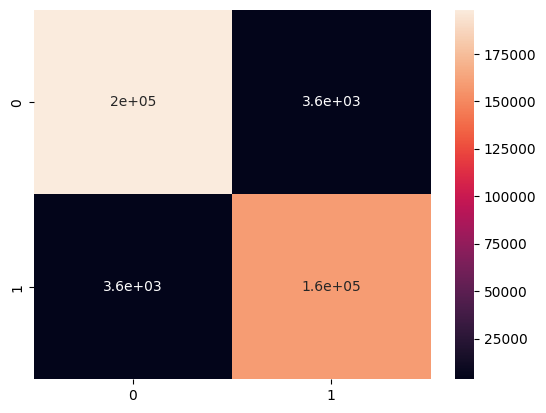

In [9]:
import seaborn as sns
sns.heatmap(confusion_mat,annot=True)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 50)        │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200, 64)        │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 200, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 200, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 200, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521,717 (1.99 MB)

 Trainable params: 173,905 (679.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,812 (1.33 MB)

**RNN**

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense,LSTM

model = Sequential()
voc_size = len(char_index.keys())
print("voc_size: {}".format(voc_size))

model.add(Embedding(voc_size + 1,50))
model.add(LSTM(64, return_sequences=True))

model.add(LSTM(64, return_sequences=True))

model.add(LSTM(64, return_sequences=True))

model.add(LSTM(64, return_sequences=True))

model.add(LSTM(64, return_sequences=True))

model.add(LSTM(64, return_sequences=True))

model.add(LSTM(64))

model.add(Dense(len(params['categories'])-1, activation='sigmoid'))

voc_size: 71


In [13]:
model.compile(loss=params['loss_function'], optimizer=params['optimizer'], metrics=['accuracy'])


hist = model.fit(x_train, y_train,
                batch_size=params['batch_train'],
                epochs=params['epoch'],
                shuffle=True,
                validation_data=(x_val, y_val)
                )


Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 159s 729ms/step - accuracy: 0.7680 - loss: 0.4408 - val_accuracy: 0.9196 - val_loss: 0.1924
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 152s 723ms/step - accuracy: 0.9243 - loss: 0.1807 - val_accuracy: 0.9345 - val_loss: 0.1575
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 202s 724ms/step - accuracy: 0.9352 - loss: 0.1559 - val_accuracy: 0.9315 - val_loss: 0.1652
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 152s 723ms/step - accuracy: 0.9436 - loss: 0.1363 - val_accuracy: 0.9432 - val_loss: 0.1410
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 152s 723ms/step - accuracy: 0.9504 - loss: 0.1211 - val_accuracy: 0.9520 - val_loss: 0.1151
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 152s 722ms/step - accuracy: 0.9572 - loss: 0.1048 - val_accuracy: 0.9592 - val_loss: 0.1005
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 152s 723ms/step - accuracy: 0.9614 - loss: 0.0953 - val_accuracy: 0.9615 - val_loss: 0.0958
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 152s 723ms/step - accuracy: 0.9616 -

In [14]:
y_pred = model.predict(x_test, batch_size=1000)
print(y_pred)



365/365 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step
[[1.1007194e-04]
 [9.9994874e-01]
 [9.9999368e-01]
 ...
 [3.6611771e-05]
 [9.9477553e-01]
 [9.9564952e-01]]


In [15]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Convert predicted probabilities to binary labels
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)
y_test=y_test.reshape(-1,1)

# Calculate classification report
report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:', confusion_mat)
print('Accuracy:',accuracy_score(y_test,y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    201736
           1       0.97      0.98      0.98    162463

    accuracy                           0.98    364199
   macro avg       0.98      0.98      0.98    364199
weighted avg       0.98      0.98      0.98    364199

Confusion Matrix: [[197162   4574]
 [  2625 159838]]
Accuracy: 0.9802333339740087


<Axes: >

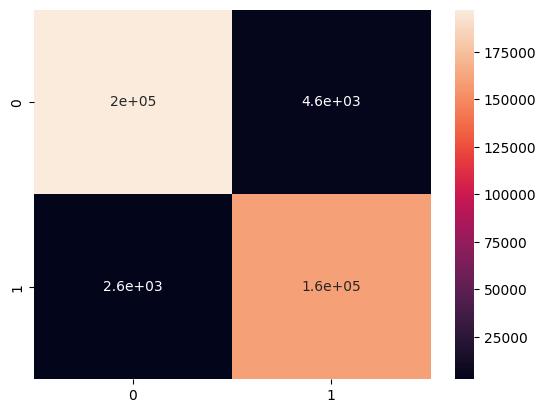

In [16]:
import seaborn as sns
sns.heatmap(confusion_mat,annot=True)

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 50)        │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 200, 64)        │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 200, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 200, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 200, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 200, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 200, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,749 (2.65 MB)

 Trainable params: 231,249 (903.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 462,500 (1.76 MB)

**ANN**

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense,LSTM
model = Sequential()
voc_size = len(char_index.keys())
print("voc_size: {}".format(voc_size))

model.add(Embedding(voc_size + 1, 50))
model.add(Dense(64, activation='tanh'))

model.add(Dense(64, activation='tanh'))

model.add(Dense(64, activation='tanh'))

model.add(Dense(64, activation='tanh'))

model.add(Dense(64, activation='tanh'))

model.add(Dense(64, activation='tanh'))

model.add(Dense(64, activation='tanh'))
model.add(Flatten())
model.add(Dense(len(params['categories'])-1, activation='sigmoid'))

       

voc_size: 71


In [19]:
model.compile(loss=params['loss_function'], optimizer=params['optimizer'], metrics=['accuracy'])


hist = model.fit(x_train, y_train,
                batch_size=params['batch_train'],
                epochs=params['epoch'],
                shuffle=True,
                validation_data=(x_val, y_val)
                )


Epoch 1/30
  1/210 ━━━━━━━━━━━━━━━━━━━━ 27:48 8s/step - accuracy: 0.5626 - loss: 0.6915

I0000 00:00:1712928876.555837      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


210/210 ━━━━━━━━━━━━━━━━━━━━ 39s 149ms/step - accuracy: 0.8027 - loss: 0.4087 - val_accuracy: 0.8641 - val_loss: 0.3089
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8738 - loss: 0.2933 - val_accuracy: 0.8820 - val_loss: 0.2788
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8812 - loss: 0.2797 - val_accuracy: 0.8830 - val_loss: 0.2757
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8825 - loss: 0.2761 - val_accuracy: 0.8857 - val_loss: 0.2717
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8837 - loss: 0.2729 - val_accuracy: 0.8840 - val_loss: 0.2727
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8856 - loss: 0.2696 - val_accuracy: 0.8869 - val_loss: 0.2686
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8866 - loss: 0.2682 - val_accuracy: 0.8875 - val_loss: 0.2681
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.8868 - loss: 0.2680 - val

In [20]:
y_pred = model.predict(x_test, batch_size=1000)
print(y_pred)



365/365 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[0.1655739 ]
 [0.99060374]
 [0.92290574]
 ...
 [0.04856234]
 [0.9799468 ]
 [0.98282456]]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Convert predicted probabilities to binary labels
y_pred_binary = (np.array(y_pred) > 0.5).astype(int)
y_test=y_test.reshape(-1,1)

# Calculate classification report
report = classification_report(y_test, y_pred_binary)
print('Classification Report:')
print(report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:', confusion_mat)
print('Accuracy:',accuracy_score(y_test,y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90    201736
           1       0.87      0.89      0.88    162463

    accuracy                           0.89    364199
   macro avg       0.89      0.89      0.89    364199
weighted avg       0.89      0.89      0.89    364199

Confusion Matrix: [[179499  22237]
 [ 17709 144754]]
Accuracy: 0.8903182051570707


<Axes: >

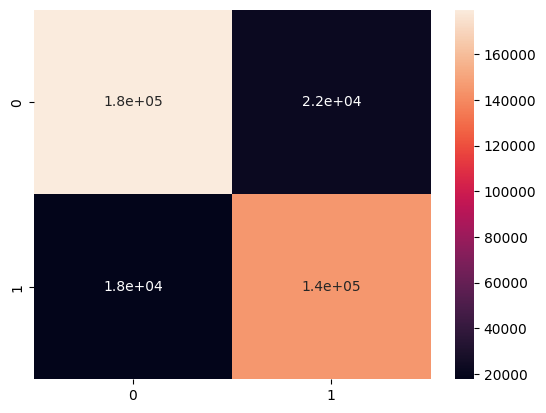

In [22]:
import seaborn as sns
sns.heatmap(confusion_mat,annot=True)

In [23]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 50)        │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200, 64)        │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 200, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200, 64)        │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │        12,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,877 (522.96 KB)

 Trainable params: 44,625 (174.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,252 (348.64 KB)